<html>
<body>
<b> Moving Wave, FFT </b>
</body>
</html>

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['figure.figsize'] = [12,12]
plt.rcParams.update({'font.size' : 18})

c = 2
L = 20
N = 1000
dx = L/N
x = np.arange(-L/2, L/2, dx)

kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

u0 = 1/np.cosh(x)
u0hat = np.fft.fft(u0)

u0hat_ri = np.concatenate((u0hat.real,u0hat.imag))

dt = 0.025
t = np.arange(0, 100*dt, dt)

def rhsWave(uhat_ri, t, kappa, c):
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -c * (1j) * kappa * uhat
    d_uhat_ri = np.concatenate((d_uhat.real, d_uhat.imag)).astype('float64')
    return d_uhat_ri

uhat_ri = odeint(rhsWave, u0hat_ri, t, args=(kappa,c))
uhat = uhat_ri[:,:N] + (1j) * uhat_ri[:,N:]

u = np.zeros_like(uhat)

for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])

u = u.real

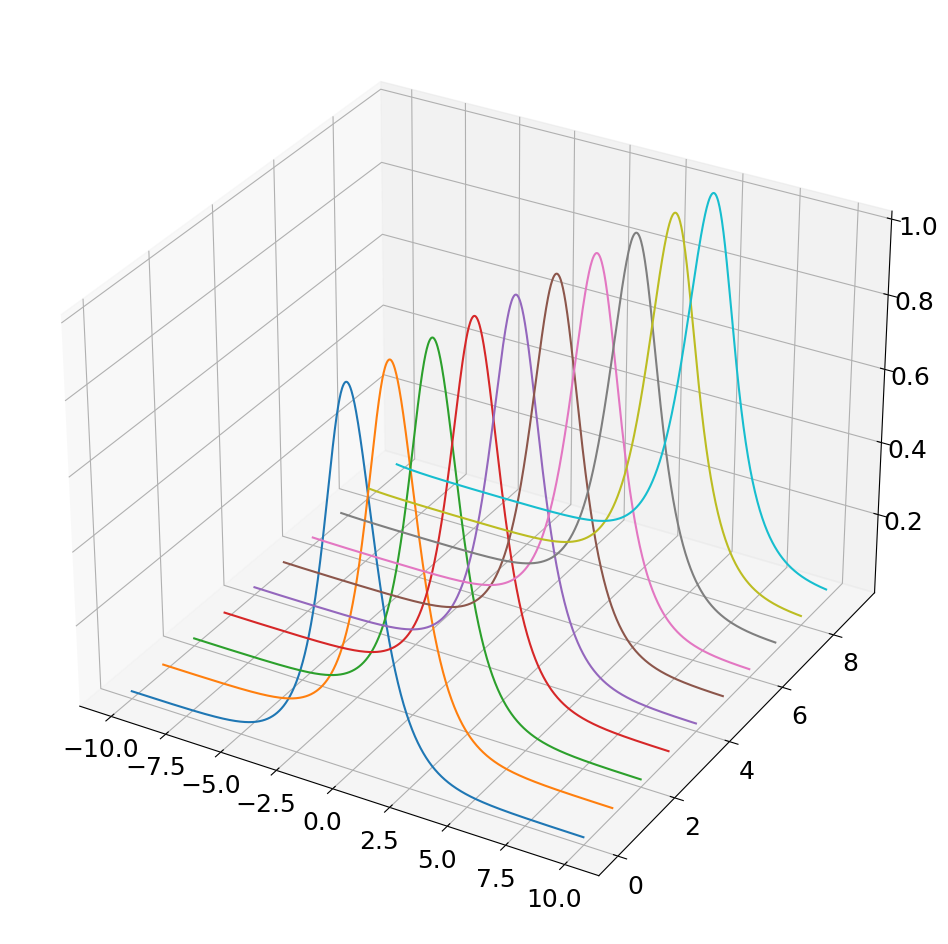

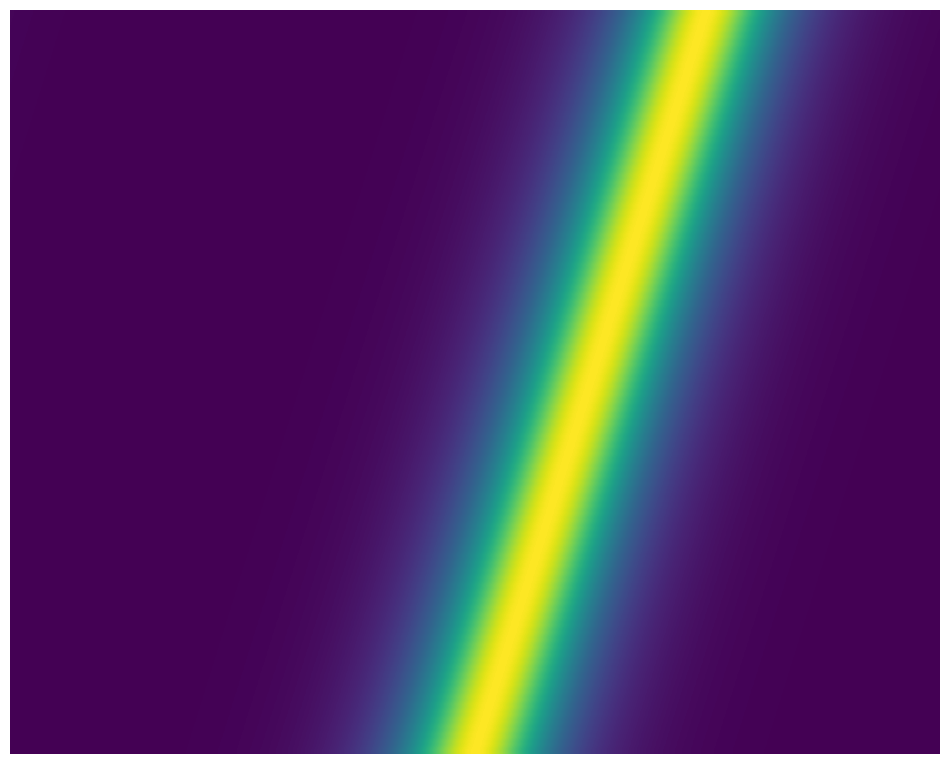

In [16]:
# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:])
    
# Image plot
plt.figure()
plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.show()

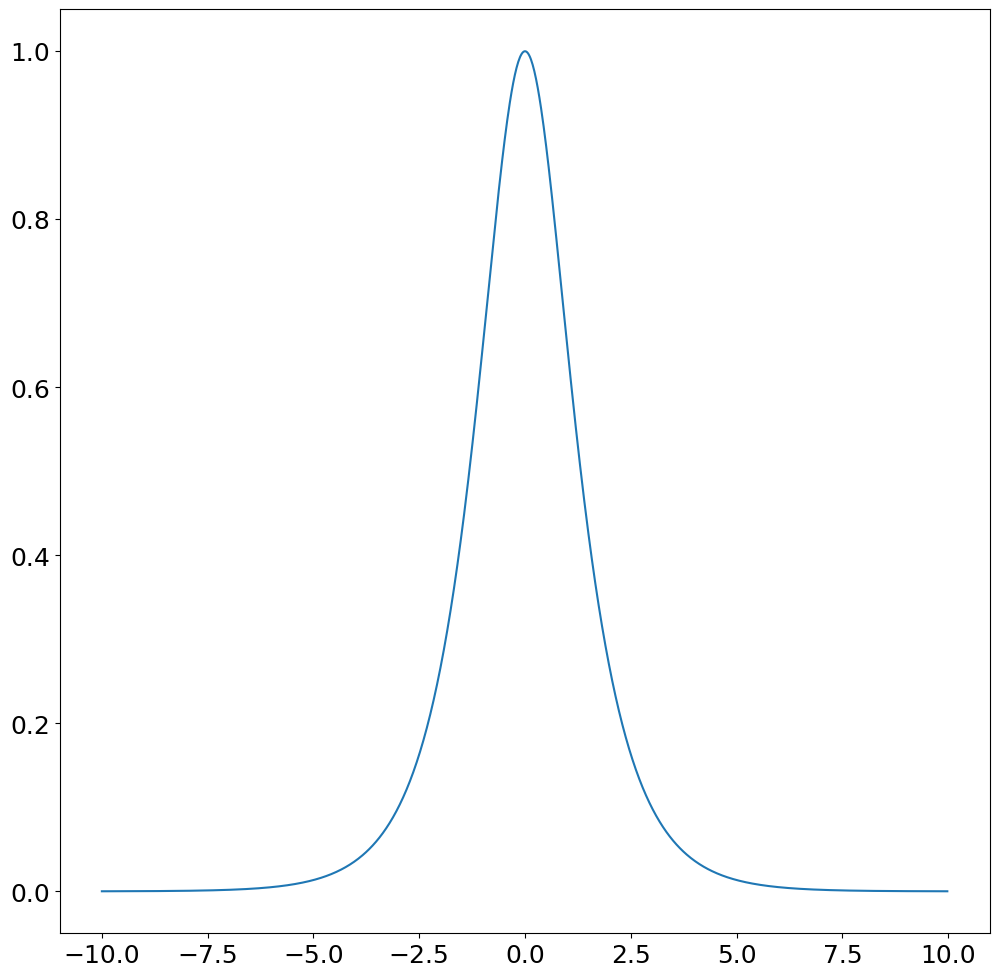

In [23]:
import matplotlib.animation as animation
from IPython.display import HTML

frames = 200
# Create a figure and axis for the animation
fig, ax = plt.subplots()

# Initialize the plot with the first frame of data
img, = ax.plot(x, u[1], '-')  # Unpack the list
ys = j*np.ones(u.shape[1])

def update(j): 
    img.set_data(x,u[j])
    return img,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(t), interval=dx, blit=True) # You may try blit=True if it works in your environment

plt.show()

# Display the animation in Jupyter notebook
HTML(ani.to_jshtml())

In [22]:
print(u)

[[9.07998593e-05 9.26341382e-05 9.45054719e-05 ... 9.64146090e-05
  9.45054719e-05 9.26341382e-05]
 [9.53376655e-05 9.37437429e-05 9.13719369e-05 ... 1.01413863e-04
  9.92828219e-05 9.74700764e-05]
 [1.00344797e-04 9.83667898e-05 9.64113028e-05 ... 1.06558349e-04
  1.04440665e-04 1.02380895e-04]
 ...
 [1.15984081e-02 1.13687816e-02 1.11436563e-02 ... 1.23155838e-02
  1.20717149e-02 1.18327179e-02]
 [1.21930263e-02 1.19516327e-02 1.17149637e-02 ... 1.29469674e-02
  1.26905946e-02 1.24393504e-02]
 [1.28181518e-02 1.25643329e-02 1.23155844e-02 ... 1.36106874e-02
  1.33412243e-02 1.30770507e-02]]
